# Modulação digital em banda base
### Objetivos:

Explicar como simular aspectos básicos de um sistema de comunicação digital em banda-base
> - Probabilidade de Erro ($P_{e}$) versus Taxa de Erro de Bit ($BER$)
> - Sinais ortogonais
> - Sinais antipodais
> - Sinais ortogonais vs sinais antipodais



## Receptor/Detector binário - Sinais Ortogonais


Dados em binário consiste em uma sequência de 0's e 1's transmitidos por meio de duas formas de onda, $s_{0}(t)$ e $s_{1}(t)$. Suponha que a taxa de bits é especificada como $R$ bits por segundo (bps). Logo, cada bit será mapeado num sinal correspondente conforme:

$$ 0 \mapsto s_{0}(t) $$

$$ 1 \mapsto s_{1}(t) $$

Para $0\leq t \leq T_{b}$, sendo $T_{b}=\frac{1}{R}$ definido como o intervalo de bit. Devemos assumir que a probabilidade de ocorrencia de bits $0$ e $1$ é a mesma - cada um ocorrendo com $50%$ de chance - e são estatisticamente mutualmente independentes.
Como já abordado nos nossos handsOns, o meio que o sinal atravessará injeta um ruido gaussiano, logo se comportará como um canal AWGN. 

Representando o ruído como $n(t) $ e o sinal recebido como $r(t)$, logo:
$$r(t)= s_{i}(t)+n(t)$$
Sendo $i=\left \{ 0,1 \right \} $, $s_{i}(t)$ é compreendido como ou sinal correspondente a 0 ou a 1. 

Como tratamos de sinais ortogonais, isso significa que:
$$ \int_{0}^{T_{b}} s_{0}(t) \cdot s_{1}(t)dt =0$$

### Receptor ótimo

O receptor ótimo consiste em duas partes bem distintas. Primeiro do correlator. E o segundo é o detector.

![Figura02](./handsOn10_matlab_figs/Correlator.png )
A figura acima mostra o processo de correlação  desde a multiplicação do sinal até a detecção.

#### Correlator de sinais 

O correlator de sinis, como o próprio nome diz, faz a correlação cruzada entre o sinal recebido $r(t)$ com o possível sinal transmitido $s_{0}(t)$ e $s_{1}(t)$. Ou seja, o correlator de sinal calcula duas saidas: 
$$r_{0}(t) = \int_{0}^{t} r(\tau) \cdot s_{0}(\tau) d\tau $$ 
$$r_{1}(t) = \int_{0}^{t} r(\tau) \cdot s_{1}(\tau) d\tau $$ 
no intervalo de  $0\leq t \leq T_{b}$, amostra as duas com uma taxa de $T_{b}$ e por fim entrega os sinais ao detector.

Por $n(t)$ é uma função de ruido gaussiano, cujo espectro de potência é de $\frac {N_{o}}{2}$, a componente de ruído $N_{0}$ e $N_{1}$ são gaussianos com média $\mu = 0$, em termos matemáticos:


$$ E(n_{0}) = \int_{0}^{T_{b}} s_{0}(t)\cdot$$ 


### Sinais ortogonais

Seja dois simbolos ortogonais entre si $s_{0}(t)$ e $s_{1}(t)$ transmitido.

![Figura01](./handsOn10_matlab_figs/Signals_Waveforms.png)
Suponhamos agora que um símbolo $s_{0}$ foi recebido de forma que $r(t)=s_{0}+n(t)$ sendo $n(t)$ o ruido, o correlator terá duas saídas. A primeira é referente ao simbolo $s_{0}$:
$$ r_{0}= \int_{0}^{T_{b}} r(t)s_{0}(t)dt $$
Como $r(t)=s_{0}+n(t)$
$$ r_{0}=\int_{0}^{T_{b}} s_{0}^{2}(t)dt + \int_{0}^{T_{b}} n(t)s_{0}dt  $$
Sendo $ E=\int_{0}^{T_{b}} s_{0}^{2}(t)dt$ em que $E$ é a energia do simbolo, a saida do correlator é dada por
$$r_{0}= E+n_{0} $$


Já o correlator referente ao simbolo $s_{1}$:
$$ r_{1}= \int_{0}^{T_{b}} r(t)s_{1}(t)dt $$
Separando símbolo e ruído
$$ r_{1}=\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt + \int_{0}^{T_{b}} n(t)s_{1}dt  $$
Por $s_{0}$ e $s_{1}$ serem sinais ortogonais, $\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt=0$ 
$$ r_{1}= n_{1} $$
Sendo $ n_{0}$ e $n_{1}$ as componentes de ruído na saida do correlator.

A energia dos dois símbolos é dita como
$$E=A^2 T_{b}$$

O mesmo se aplica quando o simbolo transmitido é $s_{1)$, com $r_{0}=n_{0}$ e $r_{1}=E+n_{1}$ 


## Exemplo:

Amostre os sinais $s_0$ e $s_1$ a uma taxa de $F_{s}=\frac{20}{T_{b}}$ (Intervalo de amostragem $T_{s}=\frac{T_{b}}{20}$) e efetue a correlação de $r(t)$ com os sinais conhecidos $s_{0}(t)$ e $s_{1}(t)$ numericamente, ou seja, calcule e plote

$$ r_{0}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{0}(kT_{s})$$
e 
$$ r_{1}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{1}(kT_{s})$$



Para $k=[1,20]$, quando 

**(a)** s_{0}(t) é o sinal transmitido;

**(b)** s_{1}(t) é o sinal transmitido;

Repita os cálculos quando o sinal $r(kT_{s})$ é recebido com um ruido aditivo gaussiano cujas amostras $n(kT_{s})$ têm média $\mu = 0$ e variancia $\sigma^{2} = 0.1$ e $\sigma^{2} = 1$


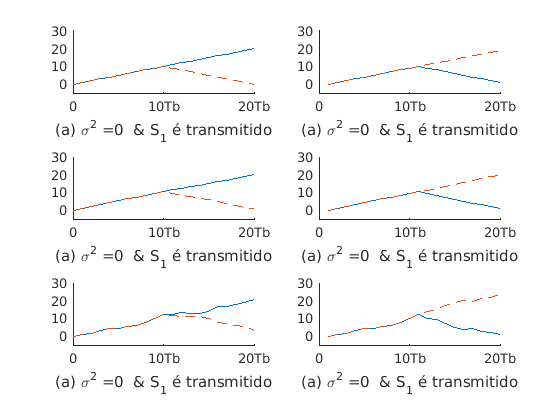

In [1]:
clc;clear all;close all;
%% Parametros
K=20;                                               % Número de amostras
A=1;                                                % Amplitude do sinal
l=0:K;                                              % Eixo amostras
% Definindo forma de onda
s_0=A*ones(1,K);                                    % Sinal 1: Um degrau
s_1=[A*ones(1,K/2) -A*ones(1,K/2)];                 % Sinal 2: Soma de degraus
% Inicializando sinais de saida
r_0=zeros(1,K);                                     % Inicializa vetor r_0
r_1=zeros(1,K);                                     % Inicializa vetor r_1
Variancia = [0 0.1 1];                              % Variâncias 

%% Cálculo
% Queremos estimar os três casos de variâncias. Criaremos um loop para testar os 3 casos 
for  i=1:3

noise=random('Normal',0,Variancia(i),1,K);
% Subcase s=s_0;
s=s_0;
r=s+noise;
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));        
end

% Plotting 
subplot(3,2,-1+2*i)
hold on
plot(l,[0 r_0],'-')
plot(l,[0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -5 30])
xlabel('(a) \sigma^2 =0  & S_{1} é transmitido')
    %----------------------------------------------------------%
% Subcase s=s_1;
s=s_1;
r=s+noise;
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));       
end

% Plotting subcaso 2
subplot(3,2,2*i)
hold on
plot([0 r_0],'-')
plot([0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -5 30])
xlabel('(a) \sigma^2 =0  & S_{1} é transmitido')
end




## Matched Filter (Filtro casado)
O filtro casado provê uma alternativa para o correlator de sinais na demodulação do sinal recebido $r(t)$. Um filtro que é casado com o sinal $s(t)$, onde $0\leq t \leq T_{b}$, têm uma resposta ao impulso 

$$ h(t)= s(T_{b}-t) $$

Consequentemente, o sinal $y(t)$ na saida do filtro casado quando o sinal de entrada é $s(t)$ é dado pela convolução integral


$$  y(t) = \int_{0}^{t} s(\tau)h(t-\tau) d\tau $$


Se substituirmos $ h(t)= s(T_{b}-t) $ na equação anterior, temos 


$$  y(t) = \int_{0}^{t} s(\tau)s(T_{b}-t+\tau) d\tau$$

e se amostrarmos $y(t)$ em $t= T_{b}$, obtêm-se

$$  y(T_{b}) = \int_{0}^{T_{b}} s^{2}(t)dt=E$$

Em que E é a energia do sinal $s(t)$. Sendo assim, a saida do filtro casado amostrado nos instantes $T_{b}$ é identica à saida do correlator de sinais.


## Detector

Após a passagem do sinal $r(t)$ pelo correlator ou filtro casado, dois sinais serão enviados para o detector. O detector é o elemento responsável por decidir se o símbolo recebido $r(t)$ representa $0$ ou $1$. O detector ótimo é definido como o detector que minimiza a probabilidade de erro. Seu funcionamento é bastante simples

** Regra de decisão**:
> $r_{0} > r_{1} \Rightarrow  s_{0}(t)$ 

> $r_{0} < r_{1}  \Rightarrow  s_{1}(t)$ 



No ponto de vista de um detector, errar significa

> $r_{0}< r_{1}$ quando $s_{0}$ é transmitido $\left\{\begin{matrix} r_{0}= E + n_{0} \\ r_{1}= n_{1} \end{matrix}\right.$ 

> $r_{0}> r_{1}$ quando $s_{1}$ é transmitido $\left\{\begin{matrix} r_{0}= n_{0} \\ r_{1}= E+ n_{1} \end{matrix}\right.$ 

Em termos estatísticos, a probabilidade de ocorrencia de erro quando $s_{0}$ é transmitido é dada por:
$$ P_{e}=P(r_{0}<r_{1})=P(n_{0}+E<n_{1})=P(E<n_{1}-n_{0})$$

Podemos a partir da equação acima chegar na equação da probabilidade abaixo

$$ P_{e}=\frac{1}{\sqrt{2\pi}\sigma_{x} } \int_{E}^{\infty} e^{\frac{-x^{2}}{2\sigma_{x}^{2}}} dx $$
 
 
$$P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right )$$
 
Sendo $E/N_{0}$ chamado de signal-to-noise ratio (SNR)
 
O detalhamento matemático pode ser encontrado no livro do [Proakis](http://shannon.ir/Bookme/Contemporary%20Communication%20Systems%20Using%20MATLAB.pdf) (Pág 194) e nos deteremos apenas ao resultado.




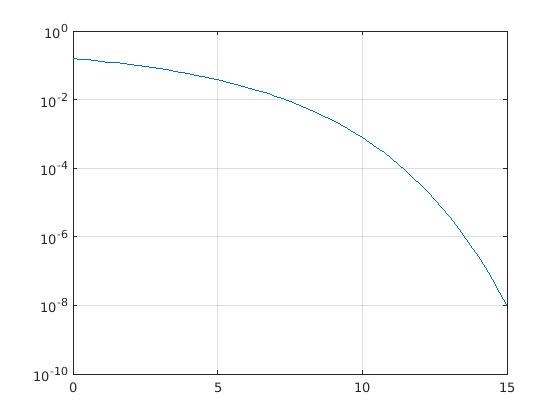

In [1]:
clc;clear all;close all;
%% Parâmetros
SNR_inicial=0;                                      % SNR inicial
SNR_final=15;                                       % SNR final
SNR_passo=0.25;                                     % Passo de SNR
SNR_dB=SNR_inicial:SNR_passo:SNR_final;             % Snr em dB
for i=1:length(SNR_dB)
    snr=10^(SNR_dB(i)/10);
    Pe(i)=qfunc(sqrt(snr));
    echo off;
end
echo on
semilogy(SNR_dB,Pe)
grid
